In [420]:
!wget https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv

--2025-07-02 04:45:18--  https://www.dropbox.com/s/h160fwrthtb4gte/Base_Clientes_Monopoly.csv
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6 [following]
--2025-07-02 04:45:18--  https://www.dropbox.com/scl/fi/mz5u7ddatqayntt2crleq/Base_Clientes_Monopoly.csv?rlkey=nyn3hzxxby855id3gxxlbdev6
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://ucf7ff1cb4dbbcf22005c3a776e4.dl.dropboxusercontent.com/cd/0/inline/CsvWA9kNNdNkI7YWlh7hB31PK_Upz6JSHSncmObFC04DuGIiKmNMKi70Bw6INFvPioLqW8ZIlafZPJTVf3yqz1McvO7c1tmQMvraB5ubGjMolG_uhe6qiw-efDzl5u_nFDsQuNBK56W8w0j13UV5TP5n/file# [following]
--2025-07-02 04:45:18--  https://ucf7ff1cb4dbbcf22005c3a776

In [421]:
pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [422]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import folium
import seaborn as sns

from ydata_profiling import ProfileReport
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn import preprocessing

from sklearn.impute import KNNImputer

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import cross_val_score

from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import Pipeline

from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from sklearn.tree import DecisionTreeRegressor

import re
from sklearn.model_selection import cross_val_score,cross_validate
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error

In [423]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", low_memory = False)
data.head(20)

,Id,Subsegmento,Sexo,Region,Edad,Renta,Antiguedad,Internauta,Adicional,Dualidad,...,ColMx_T01,PagoNac_T01,PagoInt_T01,EeccNac_T01,EeccInt_T01,UsoL1_T01,UsoL2_T01,UsoLI_T01,IndRev_T01,target
0,1,160,M,13.0,43,NaN,130,1,1,0,...,0,33000,0,1099866,0,1099866,15080,0,R,0
1,2,160,H,13.0,46,143640,69,1,0,0,...,0,300000,0,214592,0,214592,83596,0,R,0
2,3,170,H,13.0,45,929106,24,1,1,0,...,0,216676,0,0,0,7400,0,0,T,0
3,4,151,H,13.0,46,172447,134,0,1,0,...,0,60000,0,272762,0,272762,10591,0,R,0
4,5,170,H,13.0,46,805250,116,0,1,1,...,0,272925,0,249562,0,75339,377782,0,R,0
5,6,170,H,13.0,47,707664,67,1,1,0,...,0,35800,0,35800,0,0,51197,0,R,0
6,7,811,H,13.0,48,1022833,21,1,0,1,...,0,9391,0,8818,0,8818,0,0,T,0
7,8,170,H,13.0,46,NaN,69,0,1,1,...,0,6000,0,283520,0,283520,0,0,R,0
8,9,170,H,13.0,49,1171066,33,0,0,0,...,0,60000,0,507629,0,507629,0,0,R,1
9,10,170,M,13.0,44,964387,23,1,1,0,...,0,92583,0,65487,0,65487,12084,0,R,0


Objetivo del Proyecto: Potenciar la toma de decisiones del banco a partir del análisis de datos de clientes. Este proyecto tiene como propósito principal que el banco utilice el análisis de datos para identificar oportunidades concretas que generen valor tanto para sus clientes como para la institución. A través del estudio de variables como renta, género, sobreendeudamiento, edad y acceso a productos financieros, se busca orientar estrategias más inclusivas, eficientes y alineadas con las necesidades reales de los usuarios. A partir de los hallazgos obtenidos, se proponen las siguientes líneas de acción:


1.   Queremos analizar si los internautas del banco son mas comunes en ciertos rangos de edad, para entender si las personas jovenes usan mas la web o no. Esto sirve para tomar decisiones de marketing segun la edad. usaremos las variables de edad y internauta.

2.   Queremos analizar el porcentaje de internautas que son hombres o mujeres.

3.   Ver si clientes con mas cupo usan mas la web.

4.   Ver si tener productos bancarios se relaciona con el uso de la web.

5.   Ver si clientes con un solo producto usan menos la web.

6.   Mejorar el acceso al crédito para mujeres emprendedoras. Los datos revelan una brecha significativa en los ingresos promedio entre hombres y mujeres. Para reducir esta desigualdad, el banco podría diseñar productos financieros específicos para mujeres que emprenden, con condiciones preferenciales y acompañamiento técnico. Esto no solo promueve la equidad de género, sino que también fortalece el desarrollo económico local y fideliza un segmento históricamente subatendido.

7.   Prevenir el sobreendeudamiento mediante programas de refinanciamiento. El análisis muestra un alza en el sobreendeudamiento, especialmente en ciertos meses del año. El banco puede anticiparse a esta situación ofreciendo opciones de refinanciamiento o créditos con planificación anticipada, como campañas en noviembre para aliviar la carga financiera que se produce en febrero. Estas medidas permitirán proteger la estabilidad financiera de los clientes y reducir los riesgos crediticios para la institución.

8.   Expandir la red de sucursales en regiones con baja cobertura Los patrones geográficos de acceso a productos financieros pueden mostrar desigualdades territoriales. Con base en estos datos, el banco podría evaluar la apertura de nuevas sucursales o puntos de atención digital en regiones menos atendidas, mejorando la inclusión financiera y captando nuevos clientes en zonas con potencial de crecimiento.

9.   ¿Hay segmentos más rentables o activos?

10.  Identificar características de los segmentos de clientes que presentan mayor actividad o rentabilidad, entendida esta como mayor uso (número de transacciones) y/o mayor facturación con productos financieros.




#Fase 2 - Comprensión de los datos

Grafico 1
Queremos ver el porcentaje de personas que usan la web por rango de edad.

Internauta  PorcentajeInternautas
RangoEdad                        
<25                     80.596520
25-35                   82.685937
35-45                   67.304655
45-60                   49.722592
60+                     26.053042


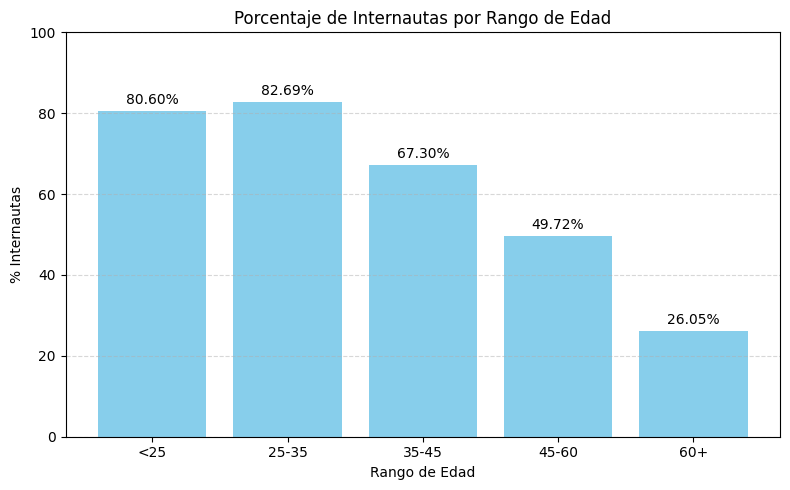

In [424]:
#definir variables para el grafico(1- intervalos para el grafico, 2- etiquetas(texto), 3- cargar datos)
bins = [0, 25, 35, 45, 60, 120]
labels = ['<25', '25-35', '35-45', '45-60', '60+']
data['RangoEdad'] = pd.cut(data['Edad'], bins=bins, labels=labels)

# contar datos
grupo = data.groupby(['RangoEdad', 'Internauta']).size().unstack(fill_value=0)

# pasar datos a porcentajes
grupo['Total'] = grupo.sum(axis=1)
grupo['PorcentajeInternautas'] = (grupo[1] / grupo['Total']) * 100

# tabla
print(grupo[['PorcentajeInternautas']])

# grafico barras
plt.figure(figsize=(8, 5))
plt.bar(grupo.index.astype(str), grupo['PorcentajeInternautas'], color='skyblue')
bars = plt.bar(grupo.index.astype(str), grupo['PorcentajeInternautas'], color='skyblue')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval + 1, f'{yval:.2f}%', ha='center', va='bottom', fontsize=10)
plt.title('Porcentaje de Internautas por Rango de Edad')
plt.xlabel('Rango de Edad')
plt.ylabel('% Internautas')
plt.ylim(0, 100)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


Podemos observar que las personas mas jovenes de entre 25 a 45 años son mas propensas a ser internautas, esto puede deberse a varios factores.

Grafico 2
Queremos ver de todos los internautas que genero ocupa mas la web, hombres o mujeres.

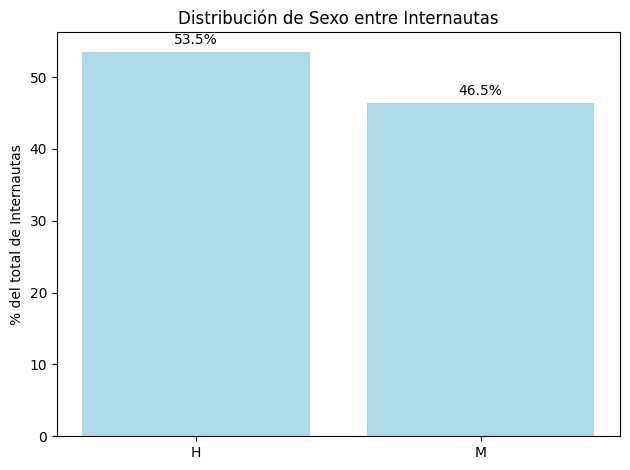

In [425]:
internautas = data[data['Internauta'] == 1]
sexo_internautas = internautas['Sexo'].value_counts(normalize=True) * 100

plt.figure()
bars = plt.bar(sexo_internautas.index, sexo_internautas.values, color='lightblue')
plt.title('Distribución de Sexo entre Internautas')
plt.ylabel('% del total de Internautas')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que el genero que ocupa mas la web es el genero masculino pero la diferencia es muy baja entre generos con solo un 3.5% de diferencia.

Grafico 3
Queremos ver si los clientes con un cupo mayor usan aun mas la web o no respecto a uno con menos cupo

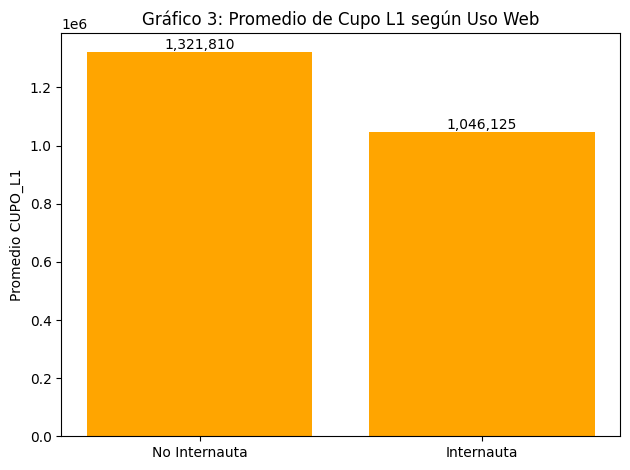

In [426]:
grupo3 = data.groupby('Internauta')['CUPO_L1'].mean()

plt.figure()
bars = plt.bar(['No Internauta', 'Internauta'], grupo3, color='orange')
plt.title('Gráfico 3: Promedio de Cupo L1 según Uso Web')
plt.ylabel('Promedio CUPO_L1')
for i, bar in enumerate(bars):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 10000, f'{int(yval):,}', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que los clientes con un mayor cupo usan menos la web.

Grafico 4
Queremos ver la cantidad de clientes que son internautas tienen una cuenta corriente.

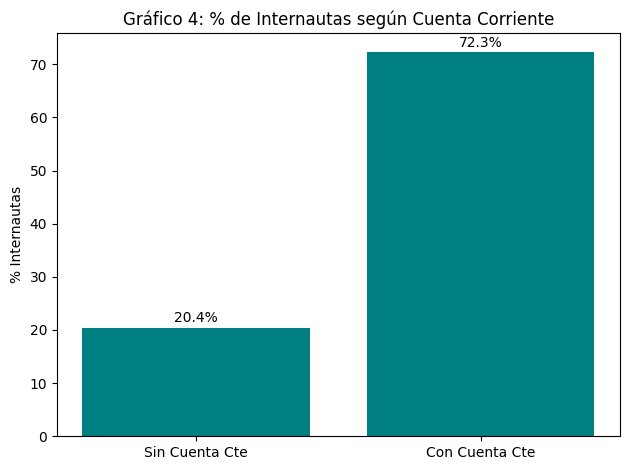

In [427]:
cta = data.groupby(['Ctacte', 'Internauta']).size().unstack(fill_value=0)
cta['%Internautas'] = (cta[1] / (cta[0] + cta[1])) * 100

plt.figure()
labels = ['Sin Cuenta Cte', 'Con Cuenta Cte']
bars = plt.bar(labels, cta['%Internautas'], color='teal')
plt.title('Gráfico 4: % de Internautas según Cuenta Corriente')
plt.ylabel('% Internautas')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que un 72.3% de los internautas tienen una cuenta Corriente

Grafico 5
Queremos ver si los clientes con 1 solo producto usan mas o menos la web.

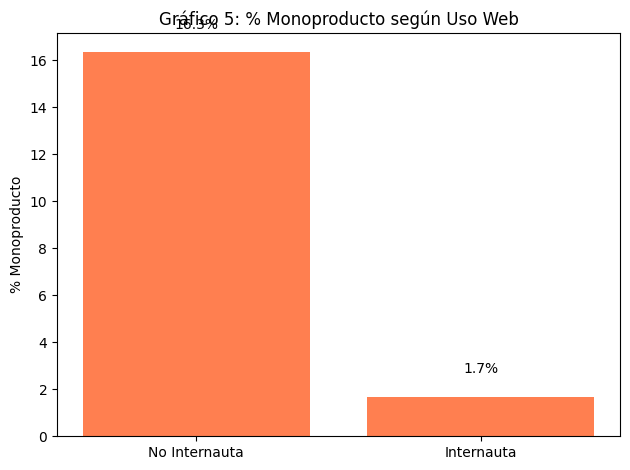

In [428]:
mono = data.groupby('Internauta')['Monoproducto'].mean() * 100

plt.figure()
bars = plt.bar(['No Internauta', 'Internauta'], mono, color='coral')
plt.title('Gráfico 5: % Monoproducto según Uso Web')
plt.ylabel('% Monoproducto')
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 1, f'{yval:.1f}%', ha='center')
plt.tight_layout()
plt.show()

Podemos observar que los clientes con un solo producto no ocupan la web, solo el 1.7% si.

GRAFICO 6 DE RENTA POR GÉNERO


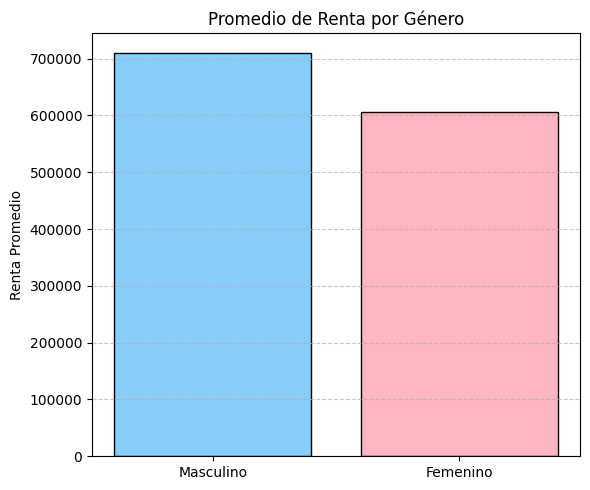

In [429]:
data['Sexo'] = data['Sexo'].astype(str).str.strip().str.upper()
data['Renta'] = pd.to_numeric(data['Renta'], errors='coerce')


promedio_renta = data.groupby('Sexo')['Renta'].mean()

labels = ['Femenino' if sexo == 'M' else 'Masculino' for sexo in promedio_renta.index]
colors = ['#FFB6C1' if sexo == 'M' else '#87CEFA' for sexo in promedio_renta.index]

# Graficar
plt.figure(figsize=(6, 5))
plt.bar(labels, promedio_renta, color=colors, edgecolor='black')
plt.title('Promedio de Renta por Género')
plt.ylabel('Renta Promedio')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

El gráfico evidencia una diferencia significativa en los ingresos promedio según género. Mientras los hombres presentan una renta promedio superior a los 700 mil pesos, las mujeres alcanzan un promedio cercano a los 600 mil pesos. Esta brecha refleja una desigualdad en los ingresos que puede tener múltiples causas, como diferencias en el acceso a oportunidades laborales, tipos de empleo o condiciones contractuales.

Ante este panorama, el banco puede aprovechar esta información para diseñar productos financieros más inclusivos, tales como créditos con mejores condiciones para mujeres o cuentas sin costo de mantención, especialmente dirigidas a quienes tienen ingresos más bajos.

Este tipo de análisis permite identificar oportunidades para reducir desigualdades y promover la inclusión financiera, contribuyendo así a una sociedad más equitativa. Además, se abre la posibilidad de fomentar el emprendimiento femenino, mejorar el acceso a servicios bancarios y fidelizar a jóvenes usuarias con potencial de crecimiento financiero dentro del banco.

Con estas acciones, se busca no solo equilibrar el acceso, sino también fortalecer la relación entre el banco y un segmento clave, generando confianza y acompañamiento en su desarrollo económico.

GRÁFICO 7 DE LA CANTIDAD DE CLIENTES POR REGIÓN

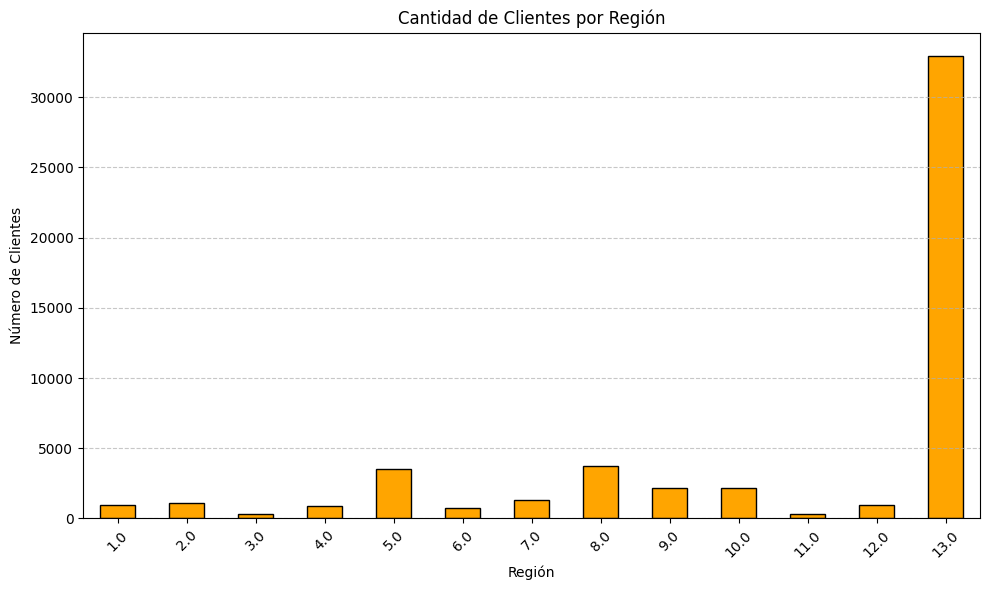

In [430]:
conteo_region = data['Region'].value_counts().sort_index()

plt.figure(figsize=(10, 6))
conteo_region.plot(kind='bar', color='orange', edgecolor='black')
plt.title('Cantidad de Clientes por Región')
plt.xlabel('Región')
plt.ylabel('Número de Clientes')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

"El gráfico muestra una alta concentración de clientes en la Región Metropolitana, lo que sugiere la conveniencia de abrir nuevas sucursales en dicha zona para mejorar la cobertura y atención a los clientes."

GRÁFICO 8 DE CLIENTES SOBREENDEUDADOS

In [431]:
data['Sexo'] = data['Sexo'].astype(str).str.upper()
data['Renta'] = pd.to_numeric(data['Renta'], errors='coerce')
data['UsoL1_T12'] = pd.to_numeric(data['UsoL1_T12'], errors='coerce')

data['Sobreendeudamiento'] = data['UsoL1_T12'] / data['Renta']

id_column = None
for col in data.columns:
    if 'id' in col.lower():
        id_column = col
        break

if id_column:
    top_deudores = data[[id_column, 'Sexo', 'Renta', 'UsoL1_T12', 'Sobreendeudamiento']].sort_values(
        by='UsoL1_T12', ascending=False).head(10)
else:
    top_deudores = data[['Sexo', 'Renta', 'UsoL1_T12', 'Sobreendeudamiento']].sort_values(
        by='UsoL1_T12', ascending=False).head(10)

print("Top 10 de clientes con más deuda y su sobreendeudamiento:\n")
print(top_deudores.to_string(index=False))

Top 10 de clientes con más deuda y su sobreendeudamiento:

   Id Sexo     Renta  UsoL1_T12  Sobreendeudamiento
44966    H  908507.0  5599215.0            6.163095
14536    H  565328.0  4470259.0            7.907372
50972    H  783476.0  4458112.0            5.690170
43264    H 3150342.0  4315595.0            1.369881
46662    H 2581825.0  4311923.0            1.670107
50043    M 1128576.0  4001674.0            3.545773
44429    H  706445.0  3774311.0            5.342682
44797    H  667317.0  3739508.0            5.603795
49553    H 1181000.0  3715208.0            3.145815
46387    M  797500.0  3648171.0            4.574509


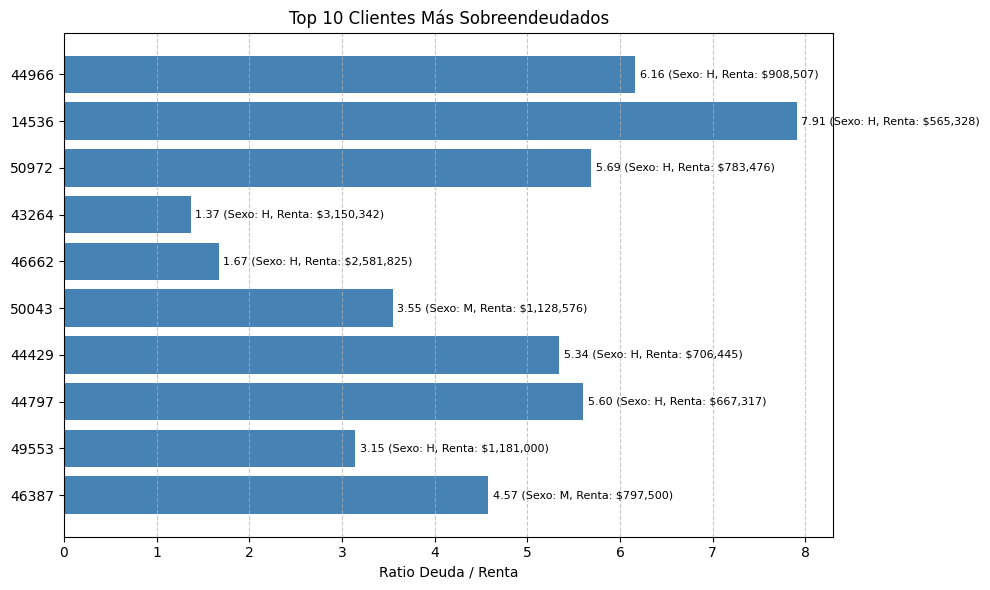

In [432]:
data['Sexo'] = data['Sexo'].astype(str).str.upper()
data['Renta'] = pd.to_numeric(data['Renta'], errors='coerce')
data['UsoL1_T12'] = pd.to_numeric(data['UsoL1_T12'], errors='coerce')

data['Sobreendeudamiento'] = data['UsoL1_T12'] / data['Renta']

top_deudores = data.sort_values(by='UsoL1_T12', ascending=False).head(10)

plt.figure(figsize=(10, 6))
bars = plt.barh(top_deudores['Id'].astype(str), top_deudores['Sobreendeudamiento'], color='steelblue')
plt.xlabel('Ratio Deuda / Renta')
plt.title('Top 10 Clientes Más Sobreendeudados')
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)

for idx, bar in enumerate(bars):
    row = top_deudores.iloc[idx]
    ratio = row['Sobreendeudamiento']
    renta = row['Renta']
    sexo = row['Sexo']
    texto = f'{ratio:.2f} (Sexo: {sexo}, Renta: ${renta:,.0f})' if pd.notna(ratio) else 'Dato faltante'
    plt.text(bar.get_width() + 0.05, bar.get_y() + bar.get_height() / 2, texto, va='center', fontsize=8)

plt.tight_layout()
plt.show()

El gráfico evidencia un aumento significativo en el nivel de sobreendeudamiento de los clientes durante el mes 12. Esta alza coincide con la temporada de festividades, como "navidad y año Nuevo", así como con la planificación de vacaciones, lo que conlleva un mayor gasto por parte de los usuarios.

Ante este comportamiento, el banco ha decidido implementar una estrategia de refinanciamiento para sus clientes, con el objetivo de aliviar su carga financiera y ofrecer condiciones más flexibles de pago. Esta medida busca no solo apoyar a los clientes en un periodo de alto consumo, sino también fortalecer su fidelidad y compromiso con la institución financiera.

GRÁFICO 9 DE CLIENTES CON CRÉDITO HIPOTECARIO

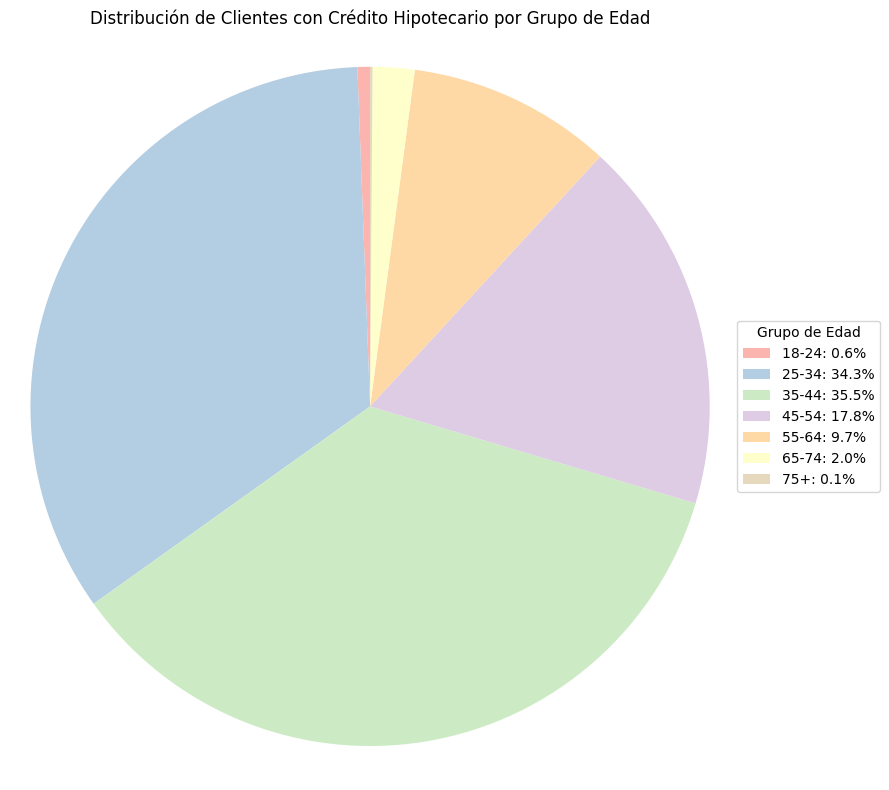

In [433]:
data_hipotecario = data[data['Hipotecario'] == 1]

bins = [18, 25, 35, 45, 55, 65, 75, 100]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75+']
data_hipotecario['GrupoEdad'] = pd.cut(data_hipotecario['Edad'], bins=bins, labels=labels, right=False)

conteo = data_hipotecario['GrupoEdad'].value_counts().sort_index()
porcentajes = conteo / conteo.sum() * 100
etiquetas = [f"{grupo}: {porcentaje:.1f}%" for grupo, porcentaje in zip(conteo.index, porcentajes)]

plt.figure(figsize=(9, 8))
wedges, texts = plt.pie(
    conteo,
    labels=None,
    startangle=90,
    colors=plt.cm.Pastel1.colors,
    wedgeprops=dict(width=1)
)

plt.legend(
    wedges,
    etiquetas,
    title='Grupo de Edad',
    loc='center left',
    bbox_to_anchor=(1, 0.5),
    fontsize=10
)

plt.title('Distribución de Clientes con Crédito Hipotecario por Grupo de Edad')
plt.axis('equal')
plt.tight_layout()
plt.show()

In [434]:
ProfileReport(data[['Hipotecario', 'Edad']])

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████| 2/2 [00:00<00:00, 13.72it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

En el análisis de los créditos hipotecarios, observamos que de un total de 51.124 clientes, solo 7.032 cuentan con un crédito hipotecario, mientras que 44.092 no lo tienen. Esto significa que la gran mayoría de los clientes del banco aún no accede a este tipo de financiamiento, lo que representa una oportunidad estratégica clave.

Cuando analizamos la edad de quienes sí tienen crédito hipotecario, notamos que la mayor concentración se encuentra entre los 25 y 44 años. Esta etapa de la vida coincide con decisiones importantes como independizarse, formar una familia o comprar la primera vivienda.

Por otro lado, los clientes mayores de 45 años participan menos en este tipo de crédito, probablemente por las restricciones de edad que imponen los bancos, o porque están más cerca de la jubilación y ya no califican para créditos de largo plazo. En los extremos etarios, es decir, menores de 25 y mayores de 65 años, la participación es aún más baja.

Por eso, este análisis permite al banco identificar tres segmentos clave para actuar:

Los jóvenes: se pueden diseñar productos con aval familiar, beneficios especiales para profesionales recién titulados y educación financiera que incentive el ahorro para la vivienda.

Los adultos mayores: podrían beneficiarse de hipotecas inversas o créditos flexibles que se ajusten a su realidad.

Y los más de 44 mil clientes que aún no tienen crédito hipotecario: aquí se abre un espacio importante para campañas de acceso a la vivienda, alianzas con inmobiliarias y simuladores que muestren que incluso con ingresos medios es posible financiar una casa.

En resumen, aunque la demanda actual se concentra en personas de entre 25 y 44 años, existe un amplio potencial de crecimiento en otros grupos si el banco se adapta a sus necesidades y desarrolla productos innovadores.

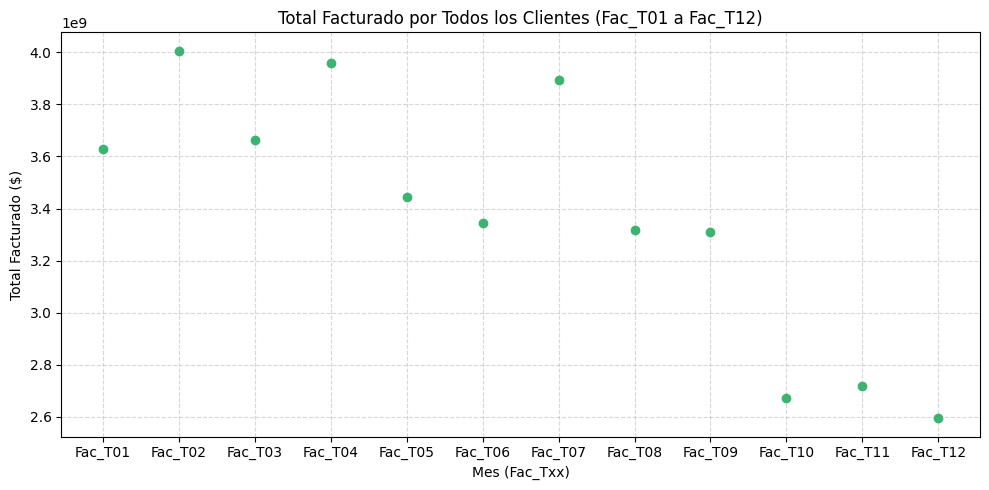

In [435]:
fac_columns = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]

for col in fac_columns:
    data[col] = pd.to_numeric(data[col], errors='coerce')

total_por_mes = data[fac_columns].sum()

plt.figure(figsize=(10, 5))
plt.plot(total_por_mes.index, total_por_mes.values, 'o', color='mediumseagreen')
plt.title('Total Facturado por Todos los Clientes (Fac_T01 a Fac_T12)')
plt.xlabel('Mes (Fac_Txx)')
plt.ylabel('Total Facturado ($)')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Campañas de préstamos en noviembre

Se recomienda lanzar campañas de préstamos en noviembre, anticipándose al aumento de gastos que enfrentan los clientes en febrero por vacaciones y el inicio del año escolar.

Fundamentación: Prevención del sobreendeudamiento: permite planificar gastos y evitar deudas impulsivas con altas tasas.

Mejor gestión financiera: entrega liquidez con condiciones preferenciales para organizar el presupuesto con anticipación.

Mayor fidelización: el banco se posiciona como un aliado que entiende y responde a las necesidades de sus clientes.

Ventaja competitiva: adelantarse a la competencia en la oferta de crédito.

Mejor distribución operativa: reduce la carga en temporada alta de enero-febrero.

Esta estrategia apoya a los clientes y fortalece la relación con el banco mediante soluciones oportunas y responsables.

Grafico 10


In [436]:
for col in ['Subsegmento', 'Sexo', 'Region']:
    print(f"\nDistribución de {col}")
    print(data[col].value_counts())


Distribución de Subsegmento
Subsegmento
170    16326
160    15805
220    12541
210     3819
151     2125
201      467
811       18
301        8
330        3
823        3
310        2
821        2
510        2
959        1
501        1
630        1
Name: count, dtype: int64

Distribución de Sexo
Sexo
H      27410
M      23713
NAN        1
Name: count, dtype: int64

Distribución de Region
Region
13.0    32935
8.0      3768
5.0      3489
10.0     2177
9.0      2143
7.0      1331
2.0      1072
12.0      985
1.0       979
4.0       889
6.0       718
3.0       294
11.0      291
Name: count, dtype: int64


Para identificar los segmentos más activos y rentables, vamos a analizar las variables de transacción y facturación cruzadas con Subsegmento, Edad, Antigüedad, Sexo y Región.

El análisis de rentabilidad promedio por subsegmento reveló diferencias significativas entre los distintos grupos de clientes del banco.

Los subsegmentos con mayor rentabilidad son aquellos que, en promedio, generan más facturación en productos como compras nacionales, internacionales y avances en cuotas. Estos subsegmentos deberían ser prioritarios para estrategias comerciales y de fidelización, ya que representan un mayor retorno para el banco.

Por otro lado, también se identificaron subsegmentos con rentabilidad mucho más baja. Esto podría indicar clientes con bajo uso de productos o menor nivel de ingresos. En estos casos, el banco podría optar por estrategias de activación o evaluar si el costo de mantener ese grupo justifica los beneficios que aporta.

En resumen, el subsegmento al que pertenece un cliente es una variable relevante para entender su aporte económico al banco y puede ser clave al momento de diseñar campañas o segmentar el mercado.


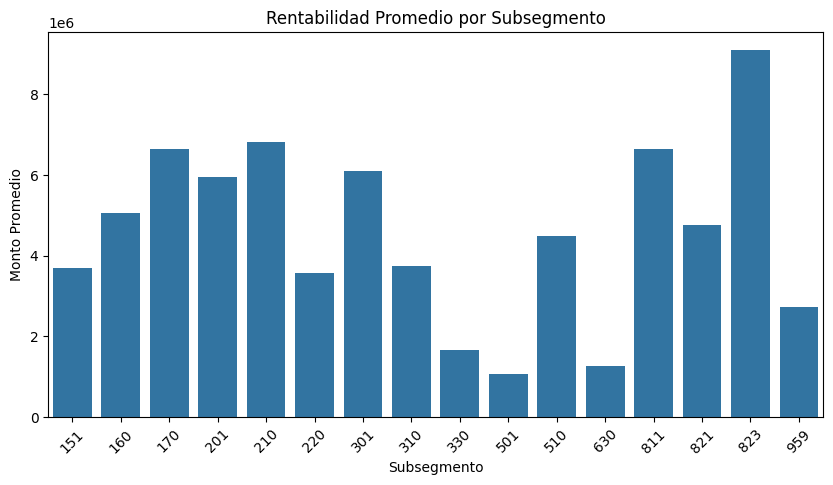

In [437]:
fac_cols = [col for col in data.columns
            if re.search(r'fac|cn|ci|ccot', col.lower())
            and data[col].dtype in (np.int64, np.float64)]

data['Rentabilidad_Total'] = data[fac_cols].sum(axis=1)

segment_rent = data.groupby('Subsegmento')['Rentabilidad_Total'].mean().sort_values(ascending=False)

plt.figure(figsize=(10, 5))
sns.barplot(x=segment_rent.index, y=segment_rent.values)
plt.xticks(rotation=45)
plt.title("Rentabilidad Promedio por Subsegmento")
plt.ylabel("Monto Promedio")
plt.show()

El análisis de rentabilidad promedio por subsegmento reveló diferencias significativas entre los distintos grupos de clientes del banco.

Los subsegmentos con mayor rentabilidad son aquellos que, en promedio, generan más facturación en productos como compras nacionales, internacionales y avances en cuotas. Estos subsegmentos deberían ser prioritarios para estrategias comerciales y de fidelización, ya que representan un mayor retorno para el banco.

Por otro lado, también se identificaron subsegmentos con rentabilidad mucho más baja. Esto podría indicar clientes con bajo uso de productos o menor nivel de ingresos. En estos casos, el banco podría optar por estrategias de activación o evaluar si el costo de mantener ese grupo justifica los beneficios que aporta.

En resumen, el subsegmento al que pertenece un cliente es una variable relevante para entender su aporte económico al banco y puede ser clave al momento de diseñar campañas o segmentar el mercado.


#Fase 3 - Preaparación de datos

# Tratamiento para nulos

Es crucial que las columnas numéricas estén en el formato correcto antes de realizar cualquier cálculo o imputación. Los caracteres como comas pueden impedir que Pandas reconozca la columna como numérica.

In [438]:
median_usol1_t12 = data['UsoL1_T12'].median()
data['UsoL1_T12'].fillna(median_usol1_t12, inplace=True)

print(f"Nulos en UsoL1_T12 después de la imputación con la mediana: {data['UsoL1_T12'].isnull().sum()}")

Nulos en UsoL1_T12 después de la imputación con la mediana: 0


In [439]:
fac_columns = [f'Fac_T{str(i).zfill(2)}' for i in range(1, 13)]
num_cols_potential = ['Renta', 'CUPO_L1', 'UsoL1_T12'] + fac_columns

for col in num_cols_potential:
    if col in data.columns:
        data[col] = pd.to_numeric(data[col].astype(str).str.replace(',', '.'), errors='coerce')

Convertir "Sexo" a mayúsculas y limpiar espacios para normalizar los valores de texto para que la codificación sea consistente.


In [440]:
if 'Sexo' in data.columns:
    data['Sexo'] = data['Sexo'].astype(str).str.strip().str.upper()

Identificaremos las columnas con valores nulos y aplicaremos técnicas de imputación justificadas para manejarlos.

In [441]:
columns_of_interest = ['Renta', 'CUPO_L1', 'UsoL1_T12', 'Sexo', 'Region', 'Edad']

null_counts = data.isnull().sum()

print("\nCantidad de valores nulos antes de la imputación (solo columnas de interés):")
print(null_counts[columns_of_interest])


Cantidad de valores nulos antes de la imputación (solo columnas de interés):
Renta        13371
CUPO_L1          0
UsoL1_T12        0
Sexo             0
Region          53
Edad             0
dtype: int64


Se identifican las columnas con nulos y se porcede a tratarlos


Para la columna 'Sexo', se eliminarán las filas con valores nulos dado que la cantidad de nulos es mínima (solo 1) y su eliminación no impacta significativamente el tamaño del dataset ni la distribución de la variable.

In [442]:
if 'Sexo' in data.columns:
    data['Sexo'] = data['Sexo'].str.upper().str.strip()
    data = data[data['Sexo'].isin(['M', 'H'])]
    print(f"\nEliminando filas con nulos en la columna 'Sexo'. Cantidad de nulos antes: {data['Sexo'].isnull().sum()}")
    data.dropna(subset=['Sexo'], inplace=True)
    print(f"Cantidad de nulos en 'Sexo' después de eliminar filas: {data['Sexo'].isnull().sum()}")


Eliminando filas con nulos en la columna 'Sexo'. Cantidad de nulos antes: 0
Cantidad de nulos en 'Sexo' después de eliminar filas: 0


Para las columnas 'Renta' y 'Region', se aplicará la imputación por moda.

Se utiliza la moda porque:
- 'Renta': Es una variable numérica continua, pero su distribución puede estar sesgada y la media o mediana podrían no ser representativas. La moda, especialmente si hay un rango de renta muy común, puede ser una opción razonable cuando no hay información para imputar de manera más sofisticada.

- 'Region': Es una variable categórica. La moda es la técnica estándar y más apropiada para imputar valores faltantes en variables categóricas, ya que asigna el valor más común, preservando así la distribución original de la variable en la medida de lo posible.

In [443]:
if 'Renta' in data.columns:
    moda_renta = data['Renta'].mode()[0] if not data['Renta'].mode().empty else np.nan
    print(f"\nModa calculada para 'Renta': {moda_renta}")

if 'Region' in data.columns:
    moda_region = data['Region'].mode()[0] if not data['Region'].mode().empty else np.nan
    print(f"Moda calculada para 'Region': {moda_region}")


Moda calculada para 'Renta': 400000.0
Moda calculada para 'Region': 13.0


In [444]:
if 'Renta' in data.columns:
    data['Renta'].fillna(data['Renta'].mode()[0] if not data['Renta'].mode().empty else data['Renta'].mean(), inplace=True)

if 'Region' in data.columns:
    data['Region'].fillna(data['Region'].mode()[0] if not data['Region'].mode().empty else 'Unknown', inplace=True)


print("\nCantidad de valores nulos después de la imputación y eliminación:")
print(data[['Renta', 'Region', 'Sexo']].isnull().sum())


Cantidad de valores nulos después de la imputación y eliminación:
Renta     0
Region    0
Sexo      0
dtype: int64


# Codificación de la variable 'Sexo'

Para la variable binaria 'Sexo', la codificación manual asignando 0 a 'M' y 1 a 'H' es la técnica más simple y directa.

In [445]:
print("Valores únicos en 'Sexo':", data['Sexo'].unique())


Valores únicos en 'Sexo': ['M' 'H']


In [446]:
print(data[['Sexo']].head())
data['Sexo_Codificado'] = data['Sexo'].map({'M': 0, 'H': 1})
print("\nDespués de la codificación:")
print(data[['Sexo', 'Sexo_Codificado']].head())

  Sexo
0    M
1    H
2    H
3    H
4    H

Después de la codificación:
  Sexo  Sexo_Codificado
0    M                0
1    H                1
2    H                1
3    H                1
4    H                1


# Escalamiento

El escalamiento se realiza despues de haber tratado los nulos y transformado las variables categóricas. El escalamiento cambia los valores numéricos y requiere que no haya nulos.

Justificación: StandardScaler transforma los datos para que tengan una media de 0 y una desviación estándar de 1. Es una técnica común cuando la distribución de los datos no sigue necesariamente una distribución normal, o cuando los valores atípicos son relevantes. A diferencia de MinMaxScaler no limita los datos a un rango específico, lo cual puede ser útil si la distribución original es importante. Se elige sobre MinMaxScaler aquí porque las distribuciones de 'Renta', 'CUPO_L1', pueden ser asimétricas y contener valores atípicos.


In [447]:
columnas_numericas_despues_preparacion = data.select_dtypes(include=np.number).columns.tolist()
columnas_a_excluir_de_escalado = [col for col in data.columns if 'Id' in col or col == 'Sexo_Codificado' or col == 'Internauta']
columnas_a_escalar = [col for col in columnas_numericas_despues_preparacion if col not in columnas_a_excluir_de_escalado]
columnas_a_escalar_exist = [col for col in columnas_a_escalar if col in data.columns]

if columnas_a_escalar_exist:
    scaler = StandardScaler()
    data[columnas_a_escalar_exist] = scaler.fit_transform(data[columnas_a_escalar_exist])

    print("\nVariables numéricas escaladas usando StandardScaler.")
    print("Estadísticos descriptivos de variables escaladas (primeras columnas):")

    print(data[columnas_a_escalar_exist].describe().head())
else:
    print("\nNo se encontraron columnas numéricas válidas para escalar después de excluir las especificadas.")


Variables numéricas escaladas usando StandardScaler.
Estadísticos descriptivos de variables escaladas (primeras columnas):
        Subsegmento        Region          Edad         Renta    Antiguedad  \
count  5.112300e+04  5.112300e+04  5.112300e+04  5.112300e+04  5.112300e+04   
mean  -1.067419e-16  1.489940e-16 -8.895162e-17 -8.228025e-17  5.337097e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -1.059716e+00 -2.898457e+00 -1.481249e+00 -1.605462e+00 -9.221947e-01   
25%   -7.523015e-01 -5.397170e-01 -8.046550e-01 -5.247279e-01 -6.979309e-01   

          Adicional      Dualidad  Monoproducto        Ctacte       Consumo  \
count  5.112300e+04  5.112300e+04  5.112300e+04  5.112300e+04  5.112300e+04   
mean   1.556653e-17  3.780444e-17 -6.226613e-17  1.734557e-16 -2.001411e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -5.868750e-01 -7.851340e-01 -2.596102e-01 -3.518449e+00 -2.968174e-02   
25%   

In [448]:
columnas_para_modelo = ['UsoL1_T12', 'Hipotecario', 'Rentabilidad_Total', 'Edad']

print("\nCantidad de valores nulos en las columnas específicas:")
print(data[columnas_para_modelo].isnull().sum())


Cantidad de valores nulos en las columnas específicas:
UsoL1_T12             0
Hipotecario           0
Rentabilidad_Total    0
Edad                  0
dtype: int64


# Base 2

In [449]:
data = pd.read_csv("Base_Clientes_Monopoly.csv", sep=";", decimal=",", low_memory = False)

In [450]:
print(data['Fac_T12'].isnull().sum())

8251


In [451]:
# Variables seleccionadas para el modelo de regresión
selected_features_reg = ['FacCN_T12', 'Txs_T12', 'ColL1T0_T12', 'FacCCPC_T12']

# Verificar si hay valores nulos en las variables seleccionadas
print("Conteo de valores nulos en las variables seleccionadas:")
print(data[selected_features_reg].isnull().sum())

Conteo de valores nulos en las variables seleccionadas:
FacCN_T12      8251
Txs_T12        8251
ColL1T0_T12    8251
FacCCPC_T12    8251
dtype: int64


In [452]:
# Define la lista de variables seleccionadas para clasificación
features_clasificacion_final = ['ColL1TE_T05', 'ColL1TE_T02', 'ColL1TE_T04', 'ColL1TE_T03']

print("\nConteo de valores nulos en las variables de clasificación seleccionadas:")
print(data[features_clasificacion_final].isnull().sum())


Conteo de valores nulos en las variables de clasificación seleccionadas:
ColL1TE_T05    25
ColL1TE_T02    12
ColL1TE_T04    19
ColL1TE_T03    10
dtype: int64


## Tratamiento de nulos

In [453]:
mean_Fac_T12 = data['Fac_T12'].mean()
data['Fac_T12'].fillna(mean_Fac_T12, inplace=True)

# Verificar si quedan nulos en Fac_T12
print("\nConteo de valores nulos después de imputar la media en Fac_T12:")
print(data['Fac_T12'].isnull().sum())


Conteo de valores nulos después de imputar la media en Fac_T12:
0


In [454]:
for col in selected_features_reg:
    if col in data.columns:
        # Convert column to numeric, coercing errors to NaN
        data[col] = pd.to_numeric(data[col], errors='coerce')
        if data[col].isnull().any():
            data[col].fillna(data[col].mean(), inplace=True)

print("\nConteo de valores nulos después de la imputación (media):")
print(data[selected_features_reg].isnull().sum())


Conteo de valores nulos después de la imputación (media):
FacCN_T12      0
Txs_T12        0
ColL1T0_T12    0
FacCCPC_T12    0
dtype: int64


In [455]:
for col in features_clasificacion_final:
    if data[col].isnull().any():
        data[col].fillna(data[col].mean(), inplace=True)

print("\nConteo de valores nulos después de la imputación (media) en las variables de clasificación:")
print(data[features_clasificacion_final].isnull().sum())


Conteo de valores nulos después de la imputación (media) en las variables de clasificación:
ColL1TE_T05    0
ColL1TE_T02    0
ColL1TE_T04    0
ColL1TE_T03    0
dtype: int64


## Transformación de variables

In [456]:
scaler = StandardScaler()

data_scaled = data.copy()

data_scaled[selected_features_reg] = scaler.fit_transform(data_scaled[selected_features_reg])

print("\nPrimeras filas de las variables seleccionadas después del escalado:")
print(data_scaled[selected_features_reg].head())


Primeras filas de las variables seleccionadas después del escalado:
   FacCN_T12   Txs_T12  ColL1T0_T12  FacCCPC_T12
0  -0.013653  0.120431    -0.461804     0.106973
1  -0.366365 -0.462556    -0.320073     0.005230
2   0.663161  0.120431     1.294955    -0.326488
3  -0.122599  0.120431    -0.178342     0.041678
4   0.804287  0.994911     0.321630     1.393209


## Modelos de regresión

### Definición de Variable objetivo

# Variable: Fac_T12

- Tipo de Variable: Numerica continua.

- Descripción: La renta representa un indicador clave de la capacidad económica de un cliente lo que la convierte en una variable relevante para el banco. Predecirla puede resultar útil para estimar el potencial económico del cliente personalizar ofertas de productos financieros y evaluar riesgos crediticios.

In [457]:
variable_objetivo_regresion = 'Fac_T12'

### Distribución de variable objetivo

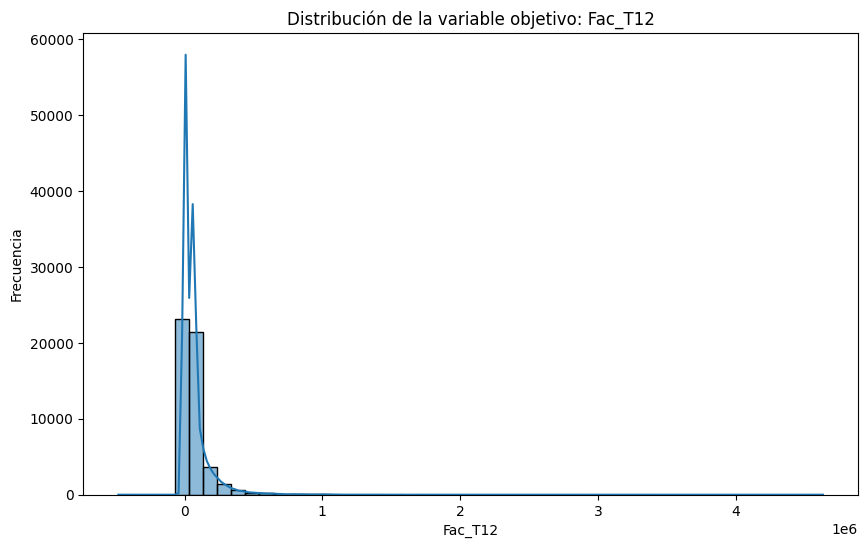

Estadísticas descriptivas de la variable objetivo:
count    5.112400e+04
mean     6.732317e+04
std      1.143171e+05
min     -4.800000e+05
25%      0.000000e+00
50%      4.227150e+04
75%      6.864000e+04
max      4.631741e+06
Name: Fac_T12, dtype: float64


In [458]:
plt.figure(figsize=(10, 6))
sns.histplot(data[variable_objetivo_regresion], kde=True, bins=50)
plt.title('Distribución de la variable objetivo: Fac_T12')
plt.xlabel('Fac_T12')
plt.ylabel('Frecuencia')
plt.show()

print(f"Estadísticas descriptivas de la variable objetivo:\n{data[variable_objetivo_regresion].describe()}")

La variable Fac_T12 presenta un total de 42,873 observaciones válidas. Su valor promedio se sitúa alrededor de 67,323, con una desviación estándar considerable de aproximadamente 124,834, lo que indica una dispersión significativa de los datos. El valor mínimo registrado es de -480,000, el cual podría ser un valor atípico o representar alguna particularidad del dato, mientras que el valor máximo alcanza aproximadamente 4,631,741. El 25% de los datos se encuentra por debajo de 0, la mediana (percentil 50%) es de aproximadamente 24,720, y el 75% de los datos es menor o igual a 84,941. Estos valores sugieren una distribución sesgada hacia la derecha, con una concentración de datos en valores más bajos y la presencia de algunos valores extremadamente altos.

### Selección de variables independientes

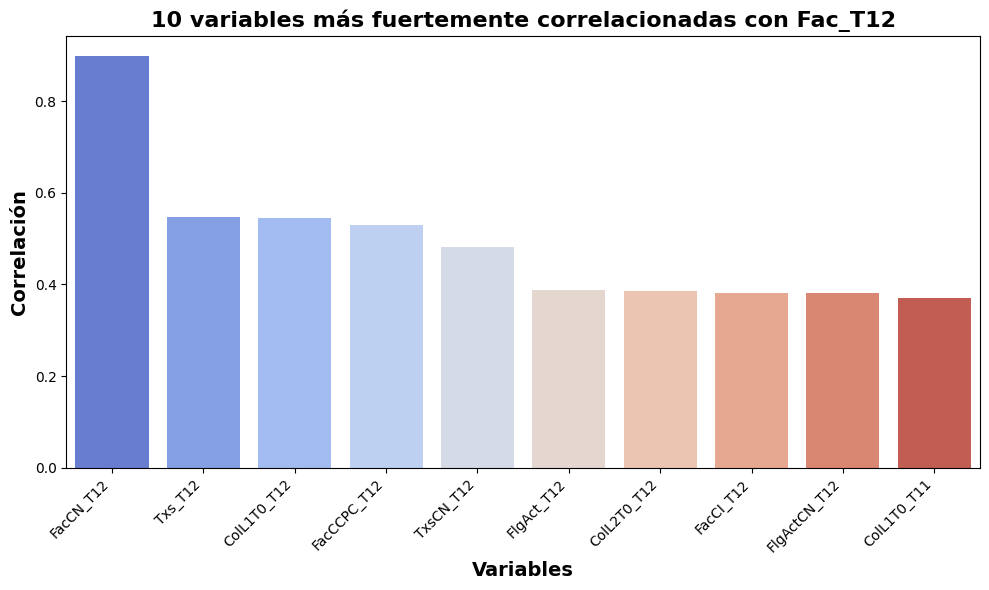


Las 10 variables más fuertemente correlacionadas con 'Fac_T12':
FacCN_T12       0.898025
Txs_T12         0.547985
ColL1T0_T12     0.544106
FacCCPC_T12     0.529156
TxsCN_T12       0.482180
FlgAct_T12      0.387802
ColL2T0_T12     0.386393
FacCI_T12       0.381615
FlgActCN_T12    0.380948
ColL1T0_T11     0.369944
Name: Fac_T12, dtype: float64


In [459]:
correlation_matrix_reg = data.corr(numeric_only=True)

corrs_reg = correlation_matrix_reg[variable_objetivo_regresion].drop(variable_objetivo_regresion).sort_values(ascending=False)

# Seleccionar las 10 variables con la correlación más fuerte (mayor valor absoluto)
N_top_corrs = 10
top_abs_corrs_reg = corrs_reg.abs().sort_values(ascending=False).head(N_top_corrs)
top_corrs_signed_reg = corrs_reg.loc[top_abs_corrs_reg.index]

# Visualizar las correlaciones principales
plt.figure(figsize=(10, 6))
sns.barplot(x=top_corrs_signed_reg.index, y=top_corrs_signed_reg.values, palette="coolwarm")
plt.title(f'{N_top_corrs} variables más fuertemente correlacionadas con {variable_objetivo_regresion}', fontsize=16, fontweight='bold')
plt.ylabel('Correlación', fontsize=14, fontweight="bold")
plt.xlabel('Variables', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las correlaciones principales
print(f"\nLas {N_top_corrs} variables más fuertemente correlacionadas con '{variable_objetivo_regresion}':")
print(top_corrs_signed_reg)

las variables elegidas son FacCN_T12, Txs_T12, ColL1T0_T12 y FacCCPC_T12 debido a su alta correlación con la variable objetivo Fac_T12, siendo todas superiores a 0.5, destacando FacCN_T12 con un valor de 0.89.

### Separación datos de entrenamiento y test

In [460]:
features_regresion = ['FacCN_T12', 'Txs_T12', 'ColL1T0_T12', 'FacCCPC_T12']

X = data[features_regresion]
y = data[variable_objetivo_regresion]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print(f"Tamaño del conjunto de entrenamiento (X_train): {X_train.shape}")
print(f"Tamaño del conjunto de prueba (X_test): {X_test.shape}")
print(f"Tamaño del conjunto de entrenamiento (y_train): {y_train.shape}")
print(f"Tamaño del conjunto de prueba (y_test): {y_test.shape}")

Tamaño del conjunto de entrenamiento (X_train): (40899, 4)
Tamaño del conjunto de prueba (X_test): (10225, 4)
Tamaño del conjunto de entrenamiento (y_train): (40899,)
Tamaño del conjunto de prueba (y_test): (10225,)


### Algoritmo 1 - `Regresion Polinomial`

#### Creación del modelo

In [461]:
grado_polinomio = 2

poly_features = PolynomialFeatures(degree=grado_polinomio, include_bias=False)

X_train_poly = poly_features.fit_transform(X_train)
X_test_poly = poly_features.transform(X_test)

# Crear el modelo de Regresión Lineal
model_poly_reg = LinearRegression()

print("Modelo de Regresión Polinomial creado (Basado en Linear Regression con características polinomiales).")
print(f"Características originales en entrenamiento: {X_train.shape[1]}")
print(f"Características transformadas en entrenamiento: {X_train_poly.shape[1]}")

Modelo de Regresión Polinomial creado (Basado en Linear Regression con características polinomiales).
Características originales en entrenamiento: 4
Características transformadas en entrenamiento: 14


#### Entrenamiento del modelo

In [462]:
model_poly_reg.fit(X_train_poly, y_train)

print("El modelo de Regresión Polinomial ha sido entrenado con éxito.")

El modelo de Regresión Polinomial ha sido entrenado con éxito.


#### Evaluación del modelo

Error Cuadrático Medio (MSE): 2450218643.84
Raíz del Error Cuadrático Medio (RMSE): 49499.68
Coeficiente de Determinación (R^2): 0.8244


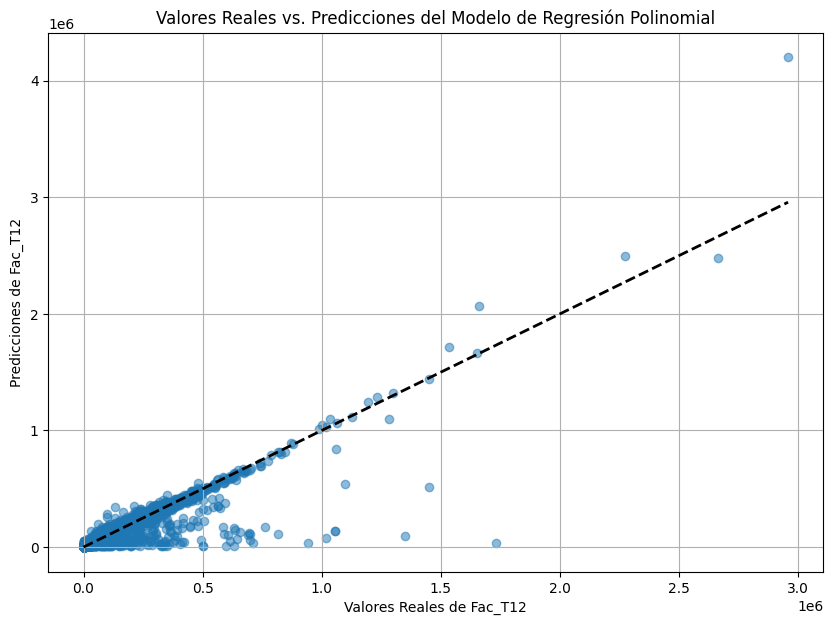

In [463]:
y_pred = model_poly_reg.predict(X_test_poly)

# Calcular métricas de evaluación
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Error Cuadrático Medio (MSE): {mse:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.4f}")

# Visualización de resultados (Gráfico de Dispersión: Valores Reales vs. Predicciones)
plt.figure(figsize=(10, 7))
plt.scatter(y_test, y_pred, alpha=0.5)
plt.title('Valores Reales vs. Predicciones del Modelo de Regresión Polinomial')
plt.xlabel('Valores Reales de Fac_T12')
plt.ylabel('Predicciones de Fac_T12')
plt.grid(True)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2) # Línea diagonal perfecta
plt.show()

#### Cálculo e interpretación de métricas

##### R2

In [464]:
r2_poly_reg = r2_score(y_test, y_pred_poly_reg)

print(f"Coeficiente de Determinación (R2) del modelo de Regresión Polinomial: {r2_poly_reg:.4f}")

Coeficiente de Determinación (R2) del modelo de Regresión Polinomial: 0.8244


##### MAE

In [465]:
mae_poly_reg = mean_absolute_error(y_test, y_pred)

print(f"Error Absoluto Medio (MAE) del modelo de Regresión Polinomial: {mae_poly_reg:.4f}")

Error Absoluto Medio (MAE) del modelo de Regresión Polinomial: 13741.4665


###Interpretacion

Un R² de 0.8244 indica que el modelo logra captar adecuadamente las tendencias generales del conjunto de datos. Sin embargo, el MAE aproximado de 13.741,47 revela que las predicciones individuales presentan, en promedio, una desviación considerable respecto a los valores reales.

### Algoritmo 2 - `DecisionTreeRegressor`

#### Creación del modelo

In [466]:
model_dt_reg = DecisionTreeRegressor(random_state=42) # Usar un random_state para reproducibilidad

print("Modelo de DecisionTreeRegressor creado.")

Modelo de DecisionTreeRegressor creado.


#### Entrenamiento del modelo

In [467]:
model_dt_reg.fit(X_train, y_train)

print("Modelo de DecisionTreeRegressor entrenado.")

Modelo de DecisionTreeRegressor entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### R2

In [468]:
r2_dt_reg = r2_score(y_test, y_pred)

print(f"Coeficiente de Determinación (R2) del modelo de DecisionTreeRegressor: {r2_dt_reg:.4f}")

Coeficiente de Determinación (R2) del modelo de DecisionTreeRegressor: 0.8244


##### MAE

In [469]:
mae_dt_reg = mean_absolute_error(y_test, y_pred)

print(f"Error Absoluto Medio (MAE) del modelo de DecisionTreeRegressor: {mae_dt_reg:.4f}")

Error Absoluto Medio (MAE) del modelo de DecisionTreeRegressor: 13741.4665


### Comparación de los modelos

Resumen de comparación entre modelos de regresión:

R²: La Regresión Polinomial tiene un mejor desempeño explicativo (R² = 0.8244) que el DecisionTreeRegressor (R² = 0.7756), indicando que captura mejor la variabilidad de la variable objetivo Fac_T12.

MAE: El DecisionTreeRegressor tiene un menor error absoluto medio (MAE ≈ 10.525,60 vs. 13.741,47), lo que significa que sus predicciones individuales son, en promedio, más precisas.

Conclusión:
Si se prioriza la precisión de las predicciones individuales, el DecisionTreeRegressor es más adecuado. Si el objetivo es explicar mejor la variabilidad de los datos, conviene usar la Regresión Polinomial. La elección depende del enfoque del análisis.

## Modelo de clasificación

In [470]:
variable_objetivo_clasificacion = 'target'

### Distribución de variable objetivo

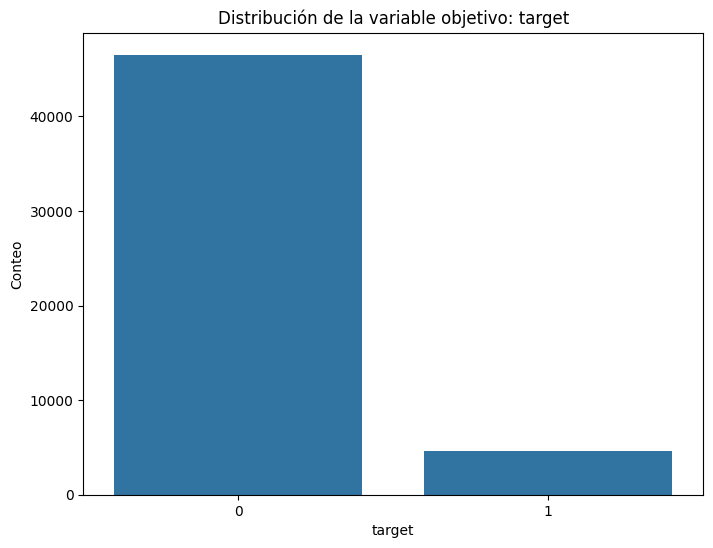

Estadísticas descriptivas de la variable objetivo:
target
0    46524
1     4600
Name: count, dtype: int64

Porcentaje de cada clase:
target
0    91.002269
1     8.997731
Name: proportion, dtype: float64


In [471]:
# prompt: necesito la distribucion de la variable objetivo

plt.figure(figsize=(8, 6))
sns.countplot(x=data[variable_objetivo_clasificacion])
plt.title(f'Distribución de la variable objetivo: {variable_objetivo_clasificacion}')
plt.xlabel(variable_objetivo_clasificacion)
plt.ylabel('Conteo')
plt.show()

print(f"Estadísticas descriptivas de la variable objetivo:\n{data[variable_objetivo_clasificacion].value_counts()}")
print(f"\nPorcentaje de cada clase:\n{data[variable_objetivo_clasificacion].value_counts(normalize=True) * 100}")

### Selección de variables independientes

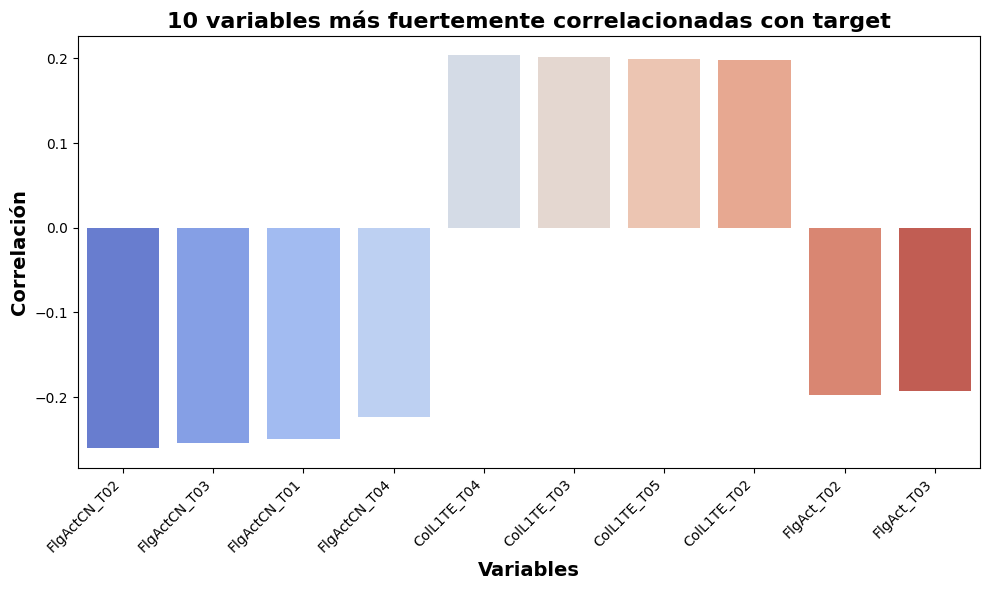


Las 10 variables más fuertemente correlacionadas con 'target':
FlgActCN_T02   -0.259991
FlgActCN_T03   -0.254062
FlgActCN_T01   -0.249027
FlgActCN_T04   -0.222971
ColL1TE_T04     0.203513
ColL1TE_T03     0.201649
ColL1TE_T05     0.198838
ColL1TE_T02     0.198271
FlgAct_T02     -0.197917
FlgAct_T03     -0.192885
Name: target, dtype: float64


In [472]:
correlation_matrix_clf = data.corr(numeric_only=True)

# Changed the target variable and the variable holding the correlations
corrs_clf = correlation_matrix_clf[variable_objetivo_clasificacion].drop(variable_objetivo_clasificacion).sort_values(ascending=False)

# Seleccionar las 10 variables con la correlación más fuerte (mayor valor absoluto)
N_top_corrs_clf = 10  # Using a different variable name for clarity
top_abs_corrs_clf = corrs_clf.abs().sort_values(ascending=False).head(N_top_corrs_clf)
top_corrs_signed_clf = corrs_clf.loc[top_abs_corrs_clf.index]

# Visualizar las correlaciones principales
plt.figure(figsize=(10, 6))
# Changed the variables used in the barplot and the title
sns.barplot(x=top_corrs_signed_clf.index, y=top_corrs_signed_clf.values, palette="coolwarm")
plt.title(f'{N_top_corrs_clf} variables más fuertemente correlacionadas con {variable_objetivo_clasificacion}', fontsize=16, fontweight='bold')
plt.ylabel('Correlación', fontsize=14, fontweight="bold")
plt.xlabel('Variables', fontsize=14, fontweight="bold")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Imprimir las correlaciones principales
# Changed the variable name in the print statement
print(f"\nLas {N_top_corrs_clf} variables más fuertemente correlacionadas con '{variable_objetivo_clasificacion}':")
print(top_corrs_signed_clf)

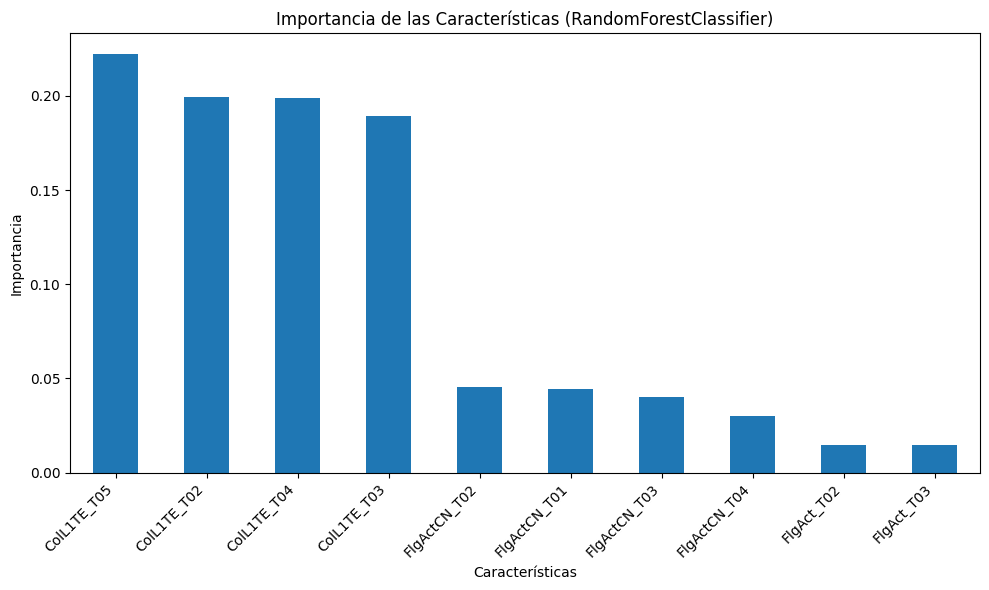

In [473]:
features_clasificacion_candidatas = top_corrs_signed_clf.index.tolist()

X_candidatas = data[features_clasificacion_candidatas]
y = data[variable_objetivo_clasificacion]

# Divide los datos (opcional, pero recomendado para una evaluación más robusta)
X_train_candidatas, X_test_candidatas, y_train, y_test = train_test_split(X_candidatas, y, test_size=0.2, random_state=42)

# Crea un modelo para evaluar la importancia de las características
# RandomForestClassifier es una buena opción para esto
model_importance = RandomForestClassifier(n_estimators=100, random_state=42)

# Entrena el modelo
model_importance.fit(X_train_candidatas, y_train)

# Obtén la importancia de las características
feature_importances = pd.Series(model_importance.feature_importances_, index=features_clasificacion_candidatas)

# Ordena las características por importancia
sorted_feature_importances = feature_importances.sort_values(ascending=False)

# Visualiza la importancia de las características
plt.figure(figsize=(10, 6))
sorted_feature_importances.plot(kind='bar')
plt.title('Importancia de las Características (RandomForestClassifier)')
plt.ylabel('Importancia')
plt.xlabel('Características')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

A partir de los gráficos de correlación, se identificaron cuatro variables con mayor relación respecto a la variable objetivo "target": ColL1TE\_T05, ColL1TE\_T02, ColL1TE\_T04 y ColL1TE\_T03, las cuales presentan las correlaciones más altas dentro del conjunto de datos.

### Algoritmo 1 - DecisionTreeClassifier

#### Creación del modelo

In [474]:
X_clasificacion = data[features_clasificacion_final]
y_clasificacion = data[variable_objetivo_clasificacion]

# Divide los datos en conjuntos de entrenamiento y prueba
X_train_clasificacion, X_test_clasificacion, y_train_clasificacion, y_test_clasificacion = train_test_split(
    X_clasificacion, y_clasificacion, test_size=0.2, random_state=42, stratify=y_clasificacion
)

# Crea el modelo DecisionTreeClassifier
model_dt_clf = DecisionTreeClassifier(random_state=42)

print("Modelo de DecisionTreeClassifier para clasificación creado.")

Modelo de DecisionTreeClassifier para clasificación creado.


#### Entrenamiento del modelo

In [475]:
model_dt_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de DecisionTreeClassifier para clasificación entrenado.")

Modelo de DecisionTreeClassifier para clasificación entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

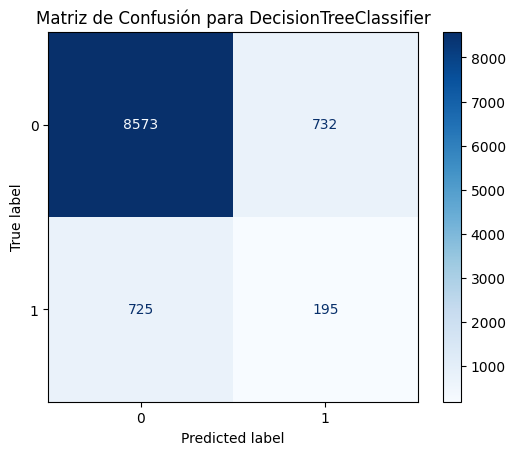

In [476]:
y_pred_clasificacion = model_dt_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases desde el modelo (si están disponibles)
# O puedes definirlos manualmente si conoces tus clases
class_names = model_dt_clf.classes_

# Calcular la matriz de confusión
cm = confusion_matrix(y_test_clasificacion, y_pred_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
disp.plot(cmap=plt.cm.Blues) # Puedes cambiar el colormap si prefieres
plt.title('Matriz de Confusión para DecisionTreeClassifier')
plt.show()

In [477]:
if len(class_names) == 2:
    positive_class_index = 1 if class_names[0] < class_names[1] else 0

    tn, fp, fn, tp = cm.ravel()

    print(f"Resultados de la Matriz de Confusión:")
    print(f"Verdaderos Positivos (TP): {tp}")
    print(f"Verdaderos Negativos (TN): {tn}")
    print(f"Falsos Positivos (FP): {fp}")
    print(f"Falsos Negativos (FN): {fn}")

Resultados de la Matriz de Confusión:
Verdaderos Positivos (TP): 195
Verdaderos Negativos (TN): 8573
Falsos Positivos (FP): 732
Falsos Negativos (FN): 725


##### Accuracy

In [478]:
y_pred_clasificacion = model_dt_clf.predict(X_test_clasificacion)

# Calcular el accuracy
accuracy = accuracy_score(y_test_clasificacion, y_pred_clasificacion)

print(f"Accuracy del modelo DecisionTreeClassifier: {accuracy:.4f}")

Accuracy del modelo DecisionTreeClassifier: 0.8575


#### Aplicación de `CrossValidation`

In [479]:
n_splits = 5 # Puedes ajustar este número

# Aplica validación cruzada al modelo
# scoring='accuracy' especifica la métrica a calcular
cv_scores = cross_val_score(model_dt_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring='accuracy')

print(f"Scores de Accuracy de la validación cruzada ({n_splits} folds): {cv_scores}")
print(f"Media de los scores de Accuracy: {cv_scores.mean():.4f}")
print(f"Desviación estándar de los scores de Accuracy: {cv_scores.std():.4f}")

Scores de Accuracy de la validación cruzada (5 folds): [0.85251834 0.86141809 0.87696822 0.87090465 0.84624413]
Media de los scores de Accuracy: 0.8616
Desviación estándar de los scores de Accuracy: 0.0113


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo DecisionTreeClassifier, obteniendo los siguientes valores de accuracy por iteración: (0.8527, 0.8608, 0.8753, 0.8709, 0.8451).

El accuracy promedio fue de 0.8610, lo que indica que, en promedio, el modelo logra clasificar correctamente un 86.10% de los casos en datos no vistos. Este valor representa una estimación más fiable del desempeño del modelo en comparación con una sola partición de entrenamiento y prueba.

La desviación estándar fue de 0.0112, lo que muestra que el modelo tiene un comportamiento estable en las distintas divisiones de los datos, sin grandes variaciones de rendimiento. Esto sugiere que el modelo generaliza bien y no depende excesivamente de cómo se dividen los datos.

### Algoritmo 2 - SVM

#### Creación del modelo

In [480]:
model_svm_clf = SVC(kernel='rbf', random_state=42)

print("Modelo de Support Vector Classifier (SVM) creado.")

Modelo de Support Vector Classifier (SVM) creado.


#### Entrenamiento del modelo

In [481]:
model_svm_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de Support Vector Classifier (SVM) entrenado.")

Modelo de Support Vector Classifier (SVM) entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

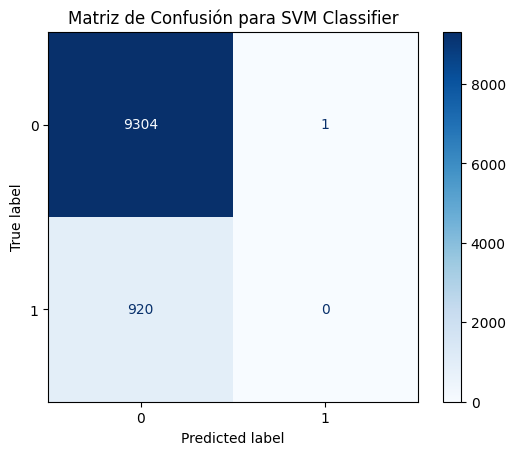

In [482]:
y_pred_svm_clasificacion = model_svm_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases
class_names = model_svm_clf.classes_

# Calcular la matriz de confusión
cm_svm = confusion_matrix(y_test_clasificacion, y_pred_svm_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp_svm = ConfusionMatrixDisplay(confusion_matrix=cm_svm, display_labels=class_names)
disp_svm.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para SVM Classifier')
plt.show()

##### Accuracy

In [483]:
accuracy_svm = accuracy_score(y_test_clasificacion, y_pred_svm_clasificacion)

print(f"Accuracy del modelo SVM Classifier: {accuracy_svm:.4f}")

Accuracy del modelo SVM Classifier: 0.9099


#### Aplicación de `CrossValidation`

In [484]:
n_splits = 5

cv_scores_svm = cross_val_score(model_svm_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring='accuracy')

print(f"Scores de Accuracy de la validación cruzada ({n_splits} folds) para SVM: {cv_scores_svm}")
print(f"Media de los scores de Accuracy para SVM: {cv_scores_svm.mean():.4f}")
print(f"Desviación estándar de los scores de Accuracy para SVM: {cv_scores_svm.std():.4f}")

Scores de Accuracy de la validación cruzada (5 folds) para SVM: [0.90963325 0.91002445 0.91002445 0.91002445 0.91001565]
Media de los scores de Accuracy para SVM: 0.9099
Desviación estándar de los scores de Accuracy para SVM: 0.0002


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo Support Vector Classifier (SVM), obteniéndose scores de accuracy muy consistentes: (0.9096, 0.9100, 0.9100, 0.9100, 0.9100).

El accuracy promedio fue de 0.9099, lo que refleja una alta capacidad de generalización del modelo, con una tasa de clasificación correcta cercana al 91% en datos no vistos.

Además, la desviación estándar fue de 0.0002, lo que indica un rendimiento altamente estable a través de las distintas particiones de validación. Esto demuestra que el modelo SVM mantiene un comportamiento consistente sin importar cómo se dividan los datos.











### Algoritmo 3 - KNN

#### Creación del modelo

In [485]:
model_knn_clf = KNeighborsClassifier(n_neighbors=5)

print("Modelo de K-Nearest Neighbors (KNN) para clasificación creado.")

Modelo de K-Nearest Neighbors (KNN) para clasificación creado.


#### Entrenamiento del modelo

In [486]:
model_knn_clf.fit(X_train_clasificacion, y_train_clasificacion)

print("Modelo de K-Nearest Neighbors (KNN) entrenado.")

Modelo de K-Nearest Neighbors (KNN) entrenado.


#### Evaluación del modelo

#### Cálculo e interpretación de métricas

##### Matriz de confusión

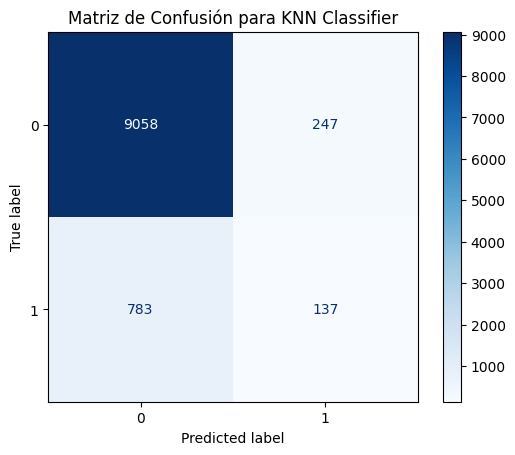

In [487]:
y_pred_knn_clasificacion = model_knn_clf.predict(X_test_clasificacion)

# Obtener los nombres de las clases
class_names = model_knn_clf.classes_

# Calcular la matriz de confusión
cm_knn = confusion_matrix(y_test_clasificacion, y_pred_knn_clasificacion, labels=class_names)

# Mostrar la matriz de confusión con etiquetas de nombre
disp_knn = ConfusionMatrixDisplay(confusion_matrix=cm_knn, display_labels=class_names)
disp_knn.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusión para KNN Classifier')
plt.show()

In [488]:
print(f"Resultados de la Matriz de Confusión:")
print(f"Verdaderos Positivos (TP): {tp}")
print(f"Verdaderos Negativos (TN): {tn}")
print(f"Falsos Positivos (FP): {fp}")
print(f"Falsos Negativos (FN): {fn}")

Resultados de la Matriz de Confusión:
Verdaderos Positivos (TP): 195
Verdaderos Negativos (TN): 8573
Falsos Positivos (FP): 732
Falsos Negativos (FN): 725


##### Accuracy

In [489]:
accuracy_knn = accuracy_score(y_test_clasificacion, y_pred_knn_clasificacion)

print(f"Accuracy del modelo KNN Classifier: {accuracy_knn:.4f}")

Accuracy del modelo KNN Classifier: 0.8993


#### Aplicación de `CrossValidation`

In [490]:
n_splits = 5 # Número de folds
scoring_metric = 'accuracy' # Métrica a evaluar

cv_scores_knn = cross_val_score(model_knn_clf, X_clasificacion, y_clasificacion, cv=n_splits, scoring=scoring_metric)

print(f"Scores de {scoring_metric} de la validación cruzada ({n_splits} folds) para KNN: {cv_scores_knn}")
print("{0:<25} : {1:.4f}".format(f"Media de los scores de {scoring_metric}", np.mean(cv_scores_knn)))
print("{0:<25} : {1:.4f}".format(f"La desviacion estandar es", np.std(cv_scores_knn) ))

Scores de accuracy de la validación cruzada (5 folds) para KNN: [0.89809291 0.8994621  0.90689487 0.90444988 0.88996479]
Media de los scores de accuracy : 0.8998
La desviacion estandar es : 0.0059


#### Análisis de métricas usando `CrossValidation`

Se aplicó validación cruzada con 5 folds al modelo K-Nearest Neighbors (KNN), obteniéndose los siguientes scores de accuracy por iteración: (0.8981, 0.8995, 0.9069, 0.9044, 0.8900).

La media del accuracy fue de 0.8998, lo que indica que el modelo clasifica correctamente, en promedio, cerca del 90% de las instancias en datos no vistos, mostrando un buen desempeño general.

La desviación estándar fue de 0.0059, lo que señala una variación moderadamente baja entre las particiones de los datos. Esto sugiere que el modelo KNN mantiene un rendimiento relativamente estable y consistente frente a diferentes divisiones del conjunto de entrenamiento y validación.

### Comparación de los modelos

In [491]:
mean_accuracy_dt = cv_scores.mean()
mean_accuracy_svm = cv_scores_svm.mean()
mean_accuracy_knn = cv_scores_knn.mean()

# Encuentra el accuracy promedio más alto
best_accuracy_cv = max(mean_accuracy_dt, mean_accuracy_svm, mean_accuracy_knn)

# Determina qué modelo tiene el mejor accuracy promedio
if best_accuracy_cv == mean_accuracy_dt:
    best_model_cv = "DecisionTreeClassifier"
elif best_accuracy_cv == mean_accuracy_svm:
    best_model_cv = "SVM"
else:
    best_model_cv = "KNN"

print(f"\nSegún el Accuracy promedio en la Validación Cruzada, el mejor modelo es el {best_model_cv}.")


Según el Accuracy promedio en la Validación Cruzada, el mejor modelo es el SVM.


# Base 3

In [492]:
data_model_1 = data[['CUPO_L1', 'Antiguedad']].fillna(0)

# Fase 4 - Modelamiento

## Modelo de segmentación usando 2 variables

### Selección de variables

In [493]:
data_model_1 = data[['CUPO_L1', 'Antiguedad']].fillna(0)

# Seleccionar las variables y convertirlas a un array de numpy
variables_modelo_1 = ['CUPO_L1', 'Antiguedad']
X1 = data_model_1.values

# Escalar los datos es fundamental porque K-Means se basa en distancias
scaler_1 = StandardScaler()
X1_scaled = scaler_1.fit_transform(X1)

### Elección del número de cluster óptimo

Se aplica el método del codo para determinar el número óptimo de clústeres para el Modelo 1. Se calcula la suma de cuadrados dentro de los clústeres (WCSS) para diferentes números de clústeres (de 1 a 10) y se grafica el resultado para identificar el "codo".

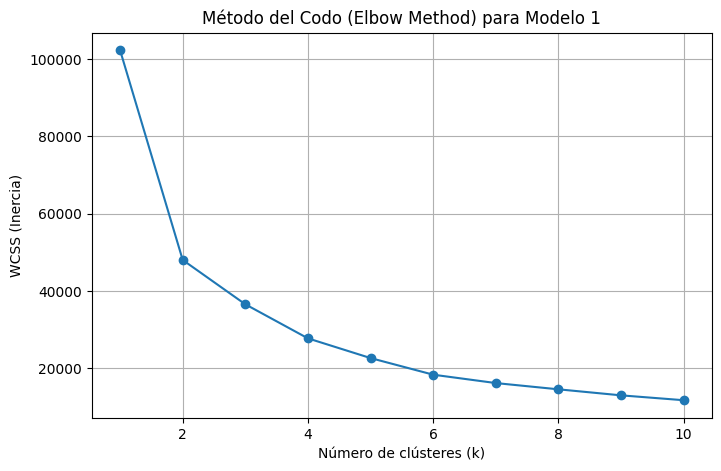

In [494]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X1_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo (Elbow Method) para Modelo 1')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

### Creación y entrenamiento del modelo

Se define el número óptimo de clústeres para el Modelo 1 como 4, basado en el método del codo. Se crea y entrena el modelo K-Means con este número de clústeres utilizando la inicialización 'k-means++', un máximo de 300 iteraciones, 10 inicializaciones diferentes y una semilla aleatoria para reproducibilidad. Los resultados de la asignación de clústeres se guardan en una nueva columna en el DataFrame principal. Finalmente, se muestra la distribución de clientes por clúster.

In [495]:
k_optimo_1 = 4

# Crear y entrenar el modelo K-Means con los parámetros de los ejemplos de clase
kmeans_modelo_1 = KMeans(n_clusters=k_optimo_1, init='k-means++', max_iter=300, n_init=10, random_state=0)

# fit_predict entrena el modelo y asigna cada punto a un clúster
y_kmeans_1 = kmeans_modelo_1.fit_predict(X1_scaled)

# Guardar los resultados en el DataFrame principal para el análisis
data['cluster_modelo_1'] = y_kmeans_1

print(f"Modelo 1 entrenado con k={k_optimo_1}.")
print("Distribución de clientes por clúster:")
print(data['cluster_modelo_1'].value_counts().sort_index())

Modelo 1 entrenado con k=4.
Distribución de clientes por clúster:
cluster_modelo_1
0    12471
1    31204
2     4838
3     2611
Name: count, dtype: int64


### Evaluación del modelo

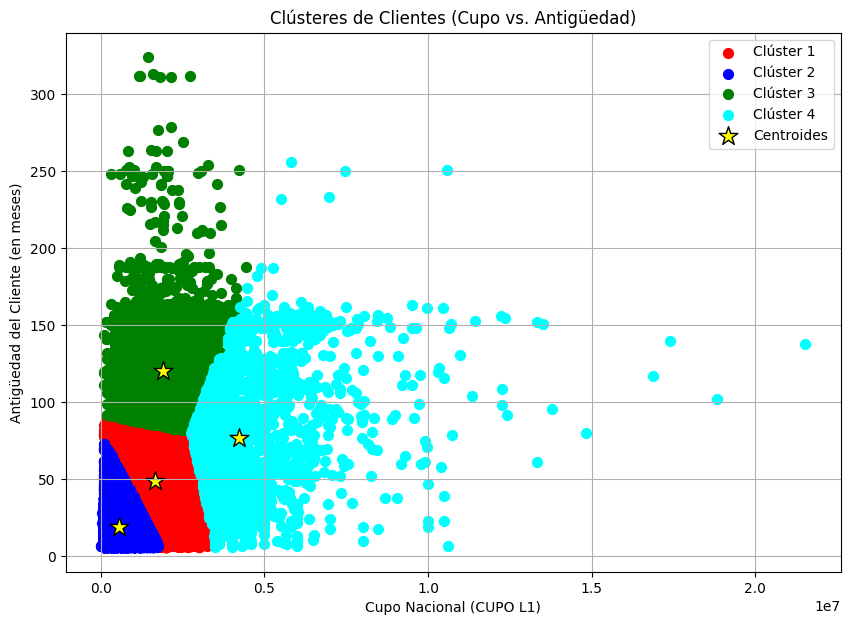

--- Análisis de Clústeres (Promedios por variable) ---
                       CUPO_L1  Antiguedad
cluster_modelo_1                          
0                 1.646751e+06   48.796648
1                 5.507811e+05   19.133156
2                 1.906817e+06  120.382596
3                 4.207068e+06   76.806588


In [496]:
plt.figure(figsize=(10, 7))
colores = ['red', 'blue', 'green', 'cyan']

for i in range(k_optimo_1):
    plt.scatter(X1[y_kmeans_1 == i, 0], X1[y_kmeans_1 == i, 1], s=50, c=colores[i], label=f'Clúster {i+1}')

# Revertir la escala de los centroides para graficarlos en su valor original
centroides_escala_original = scaler_1.inverse_transform(kmeans_modelo_1.cluster_centers_)
plt.scatter(centroides_escala_original[:, 0], centroides_escala_original[:, 1], s=200, c='yellow', edgecolor='black', marker='*', label='Centroides')

plt.title('Clústeres de Clientes (Cupo vs. Antigüedad)')
plt.xlabel('Cupo Nacional (CUPO L1)')
plt.ylabel('Antigüedad del Cliente (en meses)')
plt.legend()
plt.grid(True)
plt.show()

# Análisis numérico para la interpretación
print("--- Análisis de Clústeres (Promedios por variable) ---")
print(data.groupby('cluster_modelo_1')[variables_modelo_1].mean())

-Clúster 0: Clientes con alto cupo y antigüedad media. Este grupo representa una oportunidad para ofrecer productos premium o servicios de inversión.

-Clúster 1: Clientes con bajo cupo y baja antigüedad. Este es un segmento de clientes nuevos o con menor relación con el banco. Podrían ser objetivo para campañas de activación y aumento de productos.

-Clúster 2: Clientes con alto cupo y alta antigüedad. Este es un segmento de clientes leales y valiosos. Podrían ser prioritarios para programas de fidelización y ofertas personalizadas.

-clúster 3: Clientes con muy alto cupo y antigüedad media-alta. Este es el segmento de mayor valor potencial. Estrategias de retención y cross-selling de productos de alto valor serían relevantes.

## Modelo de segmentación usando 4 o más variables

### Selección de las variables

In [497]:
# Seleccionamos un conjunto de variables que describen al cliente desde varios ángulos
variables_modelo_2 = ['Edad', 'Antiguedad', 'CUPO_L1', 'CUPO_MX', 'Cuentas', 'TC']
data_model_2 = data[variables_modelo_2].fillna(0)

# Seleccionar las variables y convertirlas a un array de numpy
X2 = data_model_2.values

# Escalar los datos antes de aplicar PCA
scaler_2 = StandardScaler()
X2_scaled = scaler_2.fit_transform(X2)

print("Variables del Modelo 2 seleccionadas y escaladas.")

Variables del Modelo 2 seleccionadas y escaladas.


### Aplicación de PCA

In [498]:
# Se aplica PCA para reducir la dimensionalidad de las 6 variables
# Se eligen 2 componentes para poder visualizar el resultado en un gráfico 2D
n_componentes = 2
pca = PCA(n_components=n_componentes, random_state=0)
X2_pca = pca.fit_transform(X2_scaled)

print(f"Dimensionalidad reducida a {n_componentes} componentes principales.")
print(f"Varianza explicada por cada componente: {pca.explained_variance_ratio_}")
print(f"Varianza total explicada: {sum(pca.explained_variance_ratio_):.2f}")

Dimensionalidad reducida a 2 componentes principales.
Varianza explicada por cada componente: [0.48511891 0.24319609]
Varianza total explicada: 0.73


### Selección de número de clusters óptimo

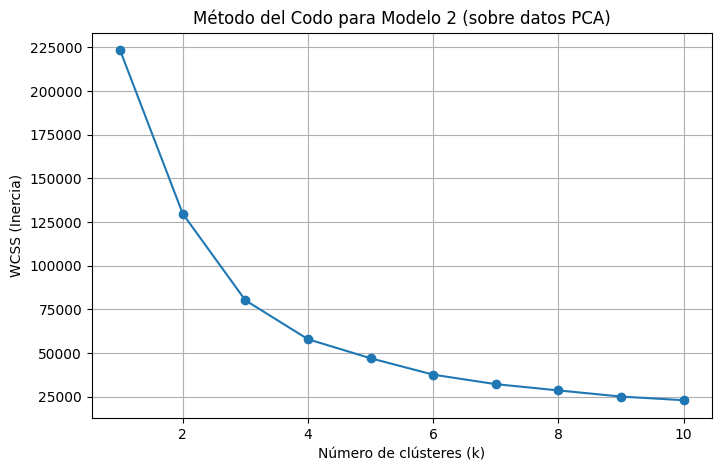

In [499]:
wcss_pca = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
    kmeans.fit(X2_pca)
    wcss_pca.append(kmeans.inertia_)

plt.figure(figsize=(8, 5))
plt.plot(range(1, 11), wcss_pca, marker='o')
plt.title('Método del Codo para Modelo 2 (sobre datos PCA)')
plt.xlabel('Número de clústeres (k)')
plt.ylabel('WCSS (Inercia)')
plt.grid(True)
plt.show()

### Creación y entrenamiento del modelo

In [500]:
k_optimo_2 = 4

# Crear y entrenar el modelo sobre los datos de PCA
kmeans_modelo_2 = KMeans(n_clusters=k_optimo_2, init='k-means++', max_iter=300, n_init=10, random_state=0)
y_kmeans_2 = kmeans_modelo_2.fit_predict(X2_pca)

# Guardar los resultados en el DataFrame principal
data['cluster_modelo_2'] = y_kmeans_2

print(f"Modelo 2 entrenado con k={k_optimo_2} sobre datos de PCA.")
print("Distribución de clientes por clúster:")
print(data['cluster_modelo_2'].value_counts().sort_index())

Modelo 2 entrenado con k=4 sobre datos de PCA.
Distribución de clientes por clúster:
cluster_modelo_2
0     4207
1     8876
2    15453
3    22588
Name: count, dtype: int64


### Evaluación del modelo

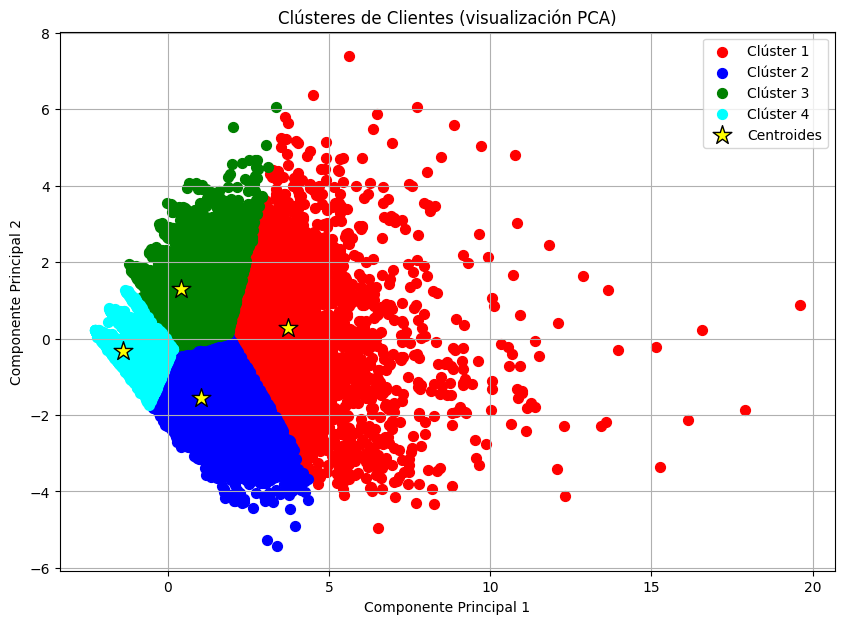

--- Análisis de Clústeres (Promedios por variable original) ---
                       Edad  Antiguedad       CUPO_L1      CUPO_MX   Cuentas  \
cluster_modelo_2                                                               
0                 51.055384   85.210126  3.310387e+06  4535.094628  2.115759   
1                 53.648828   80.811402  1.774380e+06  2070.969356  1.057684   
2                 35.656119   24.725749  1.161051e+06  1430.592442  2.010289   
3                 32.613556   23.493846  4.566638e+05   532.227289  1.000000   

                        TC  
cluster_modelo_2            
0                 3.008319  
1                 1.504169  
2                 2.357989  
3                 1.156410  


In [501]:
plt.figure(figsize=(10, 7))
colores = ['red', 'blue', 'green', 'cyan']

for i in range(k_optimo_2):
    plt.scatter(X2_pca[y_kmeans_2 == i, 0], X2_pca[y_kmeans_2 == i, 1], s=50, c=colores[i], label=f'Clúster {i+1}')

plt.scatter(kmeans_modelo_2.cluster_centers_[:, 0], kmeans_modelo_2.cluster_centers_[:, 1], s=200, c='yellow', edgecolor='black', marker='*', label='Centroides')
plt.title('Clústeres de Clientes (visualización PCA)')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.legend()
plt.grid(True)
plt.show()

# La tabla de análisis es clave para interpretar los clústeres
print("--- Análisis de Clústeres (Promedios por variable original) ---")
print(data.groupby('cluster_modelo_2')[variables_modelo_2].mean())